<a href="https://colab.research.google.com/github/hope04302/freeSearch/blob/main/CommonAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정 분석 AI
책 참고하여 AI 제작
> 시작하세요! 텐서플로 2.0 프로그래밍 - 김환희 지음
- https://github.com/wikibook/tf2

# 실험 1

5월 8일

여러 가지 테스트를 했지만 기록이 안 남아있어서...

현재 남아있는 마지막 테스트를 1로 정함

- 음절 단위로 토큰화, 가-힣ㄱ-ㅎㅏ-ㅣ0-9()?!* 제외하고는 `<unk>`로 처리
- 140자를 기준으로 뒤에 패딩(왜냐하면, 최대 길이가 140자에 근접)
- 모델은 아래와 같음

```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2500, 300, input_length=140),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

```

> 결과:
>
> 90%를 넘어가지 못함.(잘해도 85퍼 조금 넘음)
>
> [클린봇](https://d2.naver.com/helloworld/7753273)의 성적을 넘어서지 못함

> 이견:
>
> 라벨링이 더 잘된 데이터셋(조금 더 세분화해서 라벨링한 데이터)이 필요


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

In [ ]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

train_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(len(train_y), len(test_y))

4893335/4893335 [==============================] - 0s 0us/step
150000 50000


In [ ]:
# ==============================
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"""[^가-힣ㄱ-ㅎㅏ-ㅣ0-9()?!*]""", "", string)
    return string.lower()

train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_x = [clean_str(sentence) for sentence in train_text_x]
train_sentences = [list(sentence) for sentence in train_text_x]

test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_x = [clean_str(sentence) for sentence in test_text_x]
test_sentences = [list(sentence) for sentence in test_text_x]

# ===========================
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2500)
tokenizer.fit_on_texts(train_sentences)

train_x = tokenizer.texts_to_sequences(train_sentences)
train_x = pad_sequences(train_x, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가
test_x = tokenizer.texts_to_sequences(test_sentences)
test_x = pad_sequences(test_x, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가

print(train_x[:5])
print(train_y[:5])

[[  11   90  505   51   80   80  307   13   49   29  315  100   22    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 668  196   36  138   16    4  264  366    7    6  213   71  181   58
    14  148  240    8  754    5  113   95   13    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  

Epoch 1/50
1875/1875 [==============================] - 56s 26ms/step - loss: 0.6935 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 3/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5027
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.4974
Epoch 7/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - v

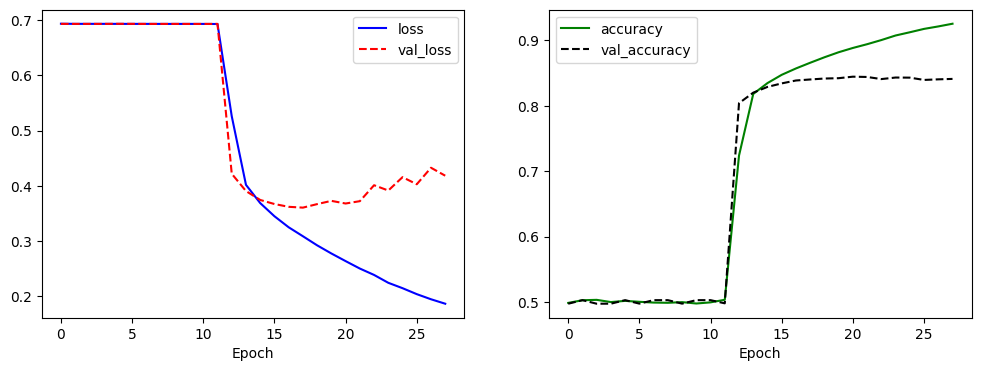

In [ ]:
# ==================================
model = tf.keras.Sequential([
    # 길이 300의 임베딩 벡터로
    tf.keras.layers.Embedding(2500, 300, input_length=140),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

# ================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
# plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
for i in range(20):
    print(test_text_x[i], test_y[i])
    print(model.predict(test_x[i:i + 1], verbose=0)[0])

굳ㅋ [0 1]
[7.7514065e-04 9.9922490e-01]
 [1 0]
[0.4220208 0.5779792]
뭐야이평점들은나쁘진않지만10점짜리는더더욱아니잖아 [1 0]
[0.725873 0.274127]
지루하지는않은데완전막장임돈주고보기에는 [1 0]
[9.9969923e-01 3.0075340e-04]
3만아니었어도별다섯개줬을텐데왜3로나와서제심기를불편하게하죠?? [1 0]
[0.9289815  0.07101853]
음악이주가된최고의음악영화 [0 1]
[0.00422776 0.9957722 ]
진정한쓰레기 [1 0]
[0.9950368  0.00496318]
마치미국애니에서튀어나온듯한창의력없는로봇디자인부터가고개를젖게한다 [1 0]
[0.9942141  0.00578592]
갈수록개판되가는중국영화유치하고내용없음폼잡다끝남말도안되는무기에유치한남무아그립다동사서독같은영화가이건3류아류작이다 [1 0]
[9.9987662e-01 1.2341778e-04]
이별의아픔뒤에찾아오는새로운인연의기쁨모든사람이그렇지는않네 [0 1]
[0.28877094 0.711229  ]
괜찮네요오랜만포켓몬스터잼밌어요 [0 1]
[1.2270584e-04 9.9987733e-01]
한국독립영화의한계그렇게아버지가된다와비교됨 [1 0]
[0.56261176 0.4373882 ]
청춘은아름답다그아름다움은이성을흔들어놓는다찰나의아름다움을잘포착한섬세하고아름다운수채화같은퀴어영화이다 [0 1]
[0.09688645 0.90311354]
눈에보이는반전이었지만영화의흡인력은사라지지않았다 [0 1]
[0.495155   0.50484496]
스토리연출연기비주얼등영화의기본조차안된영화에무슨평을해이런영화찍고도김문옥감독은내가영화경력이몇인데조무래기들이내영화를평론해?같은마인드에빠져있겠지? [1 0]
[0.9878913  0.01210874]
소위ㅈ문가라는평점은뭐냐? [0 1]
[0.8078405  0.19215949]
최고!!!!!!!!!!!!!!!! [0 1]
[1.7030330e-04 9.9982965e-01]
발

In [ ]:
SENT = '''사람들이 쓰레기를 쓰레기통에 버렸다'''

# 가공
SENT = clean_str(SENT)
lst_one = [SENT[:i + 1] for i in range(len(SENT))]
lst = [list(SENT[:i + 1]) for i in range(len(SENT))]
lst = tokenizer.texts_to_sequences(lst)
lst = pad_sequences(lst, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가

for i, j in zip(lst, lst_one):
    print(j, model.predict(np.array([i]), verbose=0)[0][1])

사 0.5822158
사람 0.64492875
사람들 0.7922854
사람들이 0.893181
사람들이쓰 0.21998772
사람들이쓰레 0.032976378
사람들이쓰레기 0.013215397
사람들이쓰레기를 0.011502097
사람들이쓰레기를쓰 0.023462975
사람들이쓰레기를쓰레 0.007548652
사람들이쓰레기를쓰레기 0.0058804913
사람들이쓰레기를쓰레기통 0.0056397365
사람들이쓰레기를쓰레기통에 0.0077440785
사람들이쓰레기를쓰레기통에버 0.032295212
사람들이쓰레기를쓰레기통에버렸 0.0071959537
사람들이쓰레기를쓰레기통에버렸다 0.0072855246
